In [1]:
%matplotlib widget

In [2]:
from csd.global_result_manager import GlobalResultManager

## Q1: Does our detector implementation yield better results than Homodyne?
#### Let's check it out for several modes

In [3]:
import numpy as np
alpha_init = 0.1
alpha_end = 1.4
number_points_to_plot = 16
alpha_step = (alpha_end - alpha_init) / number_points_to_plot
alphas = list(np.arange(alpha_init, alpha_end, alpha_step))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
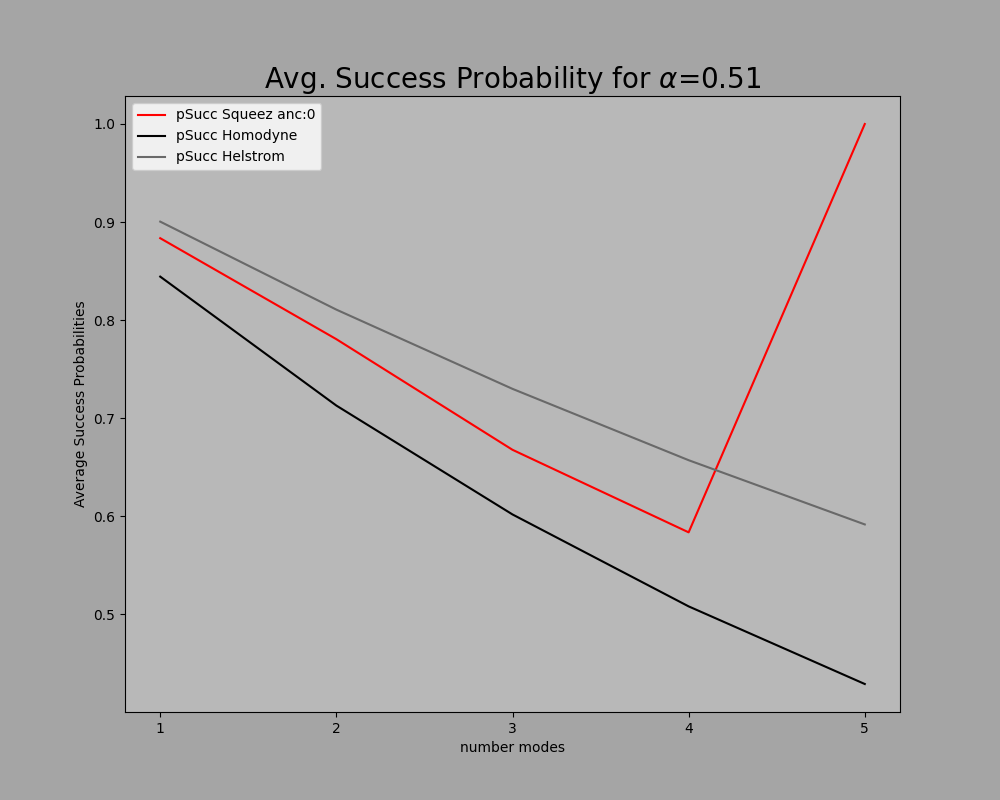

In [4]:
GlobalResultManager().plot_modes_probs(one_alpha=alphas[5], save_plot=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
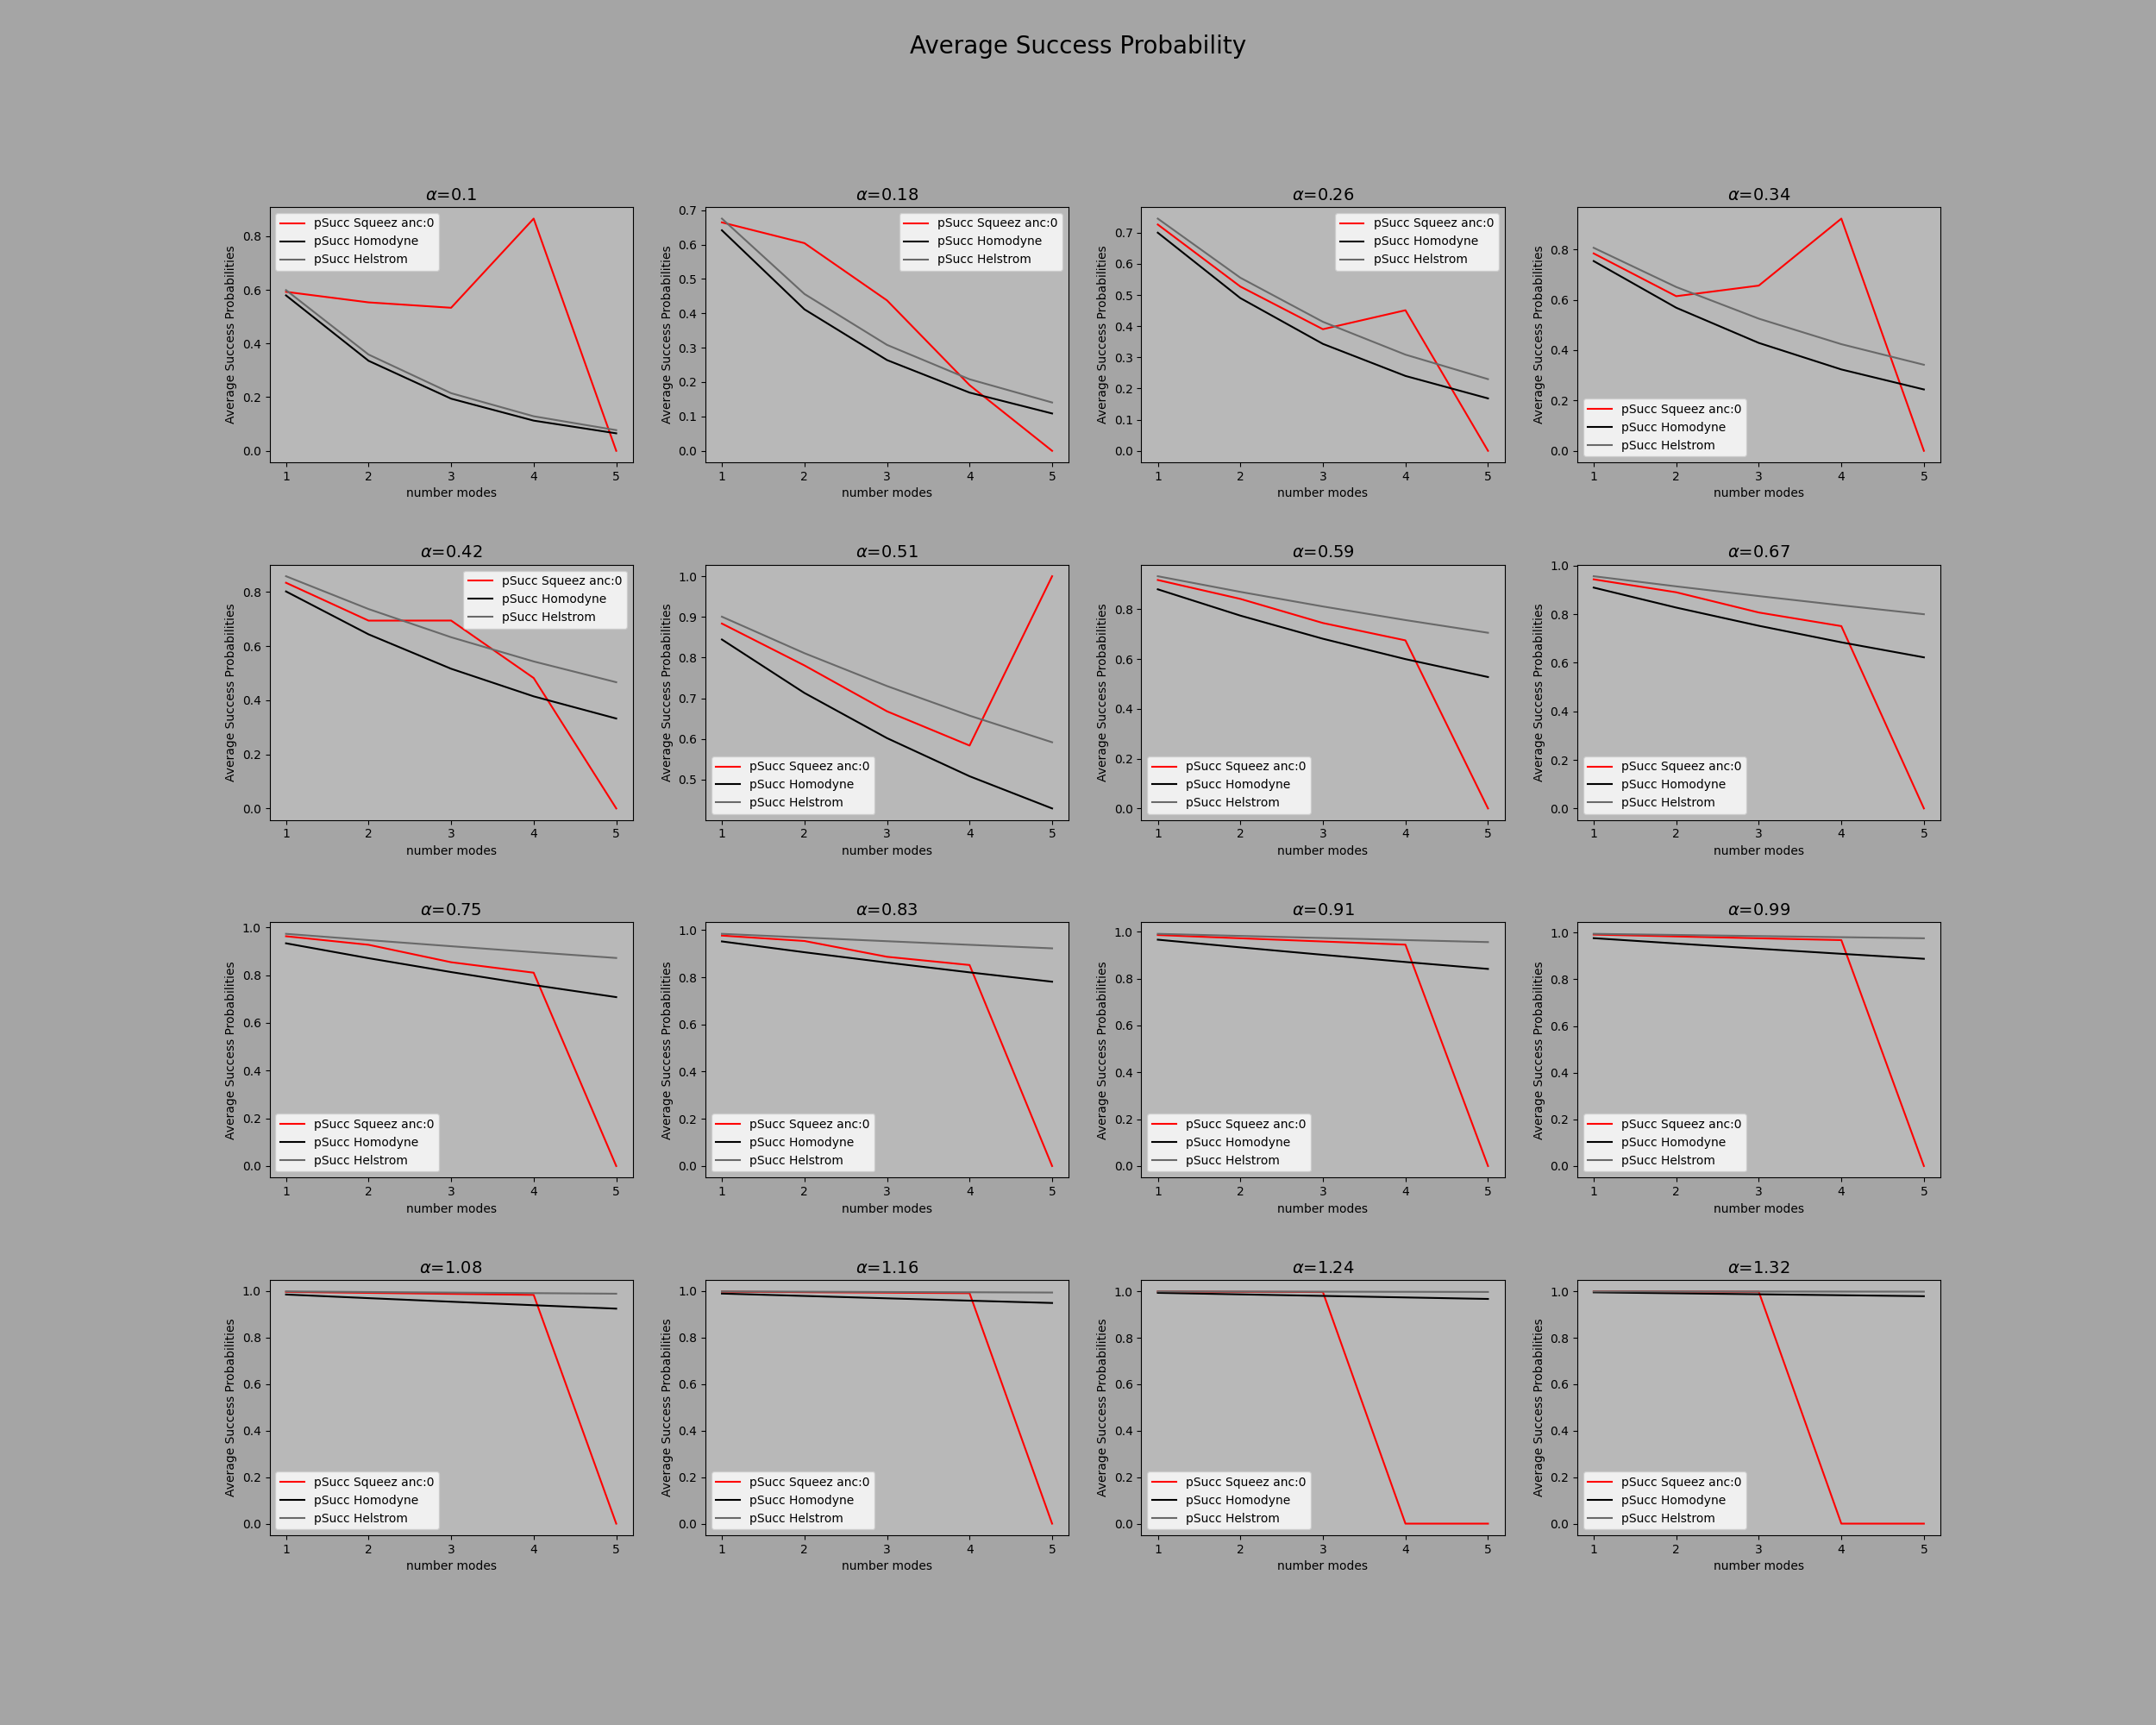

In [5]:
GlobalResultManager().plot_modes_probs(save_plot=False)

## Q2: How does it scale with the number of modes compared to the homodyne?

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
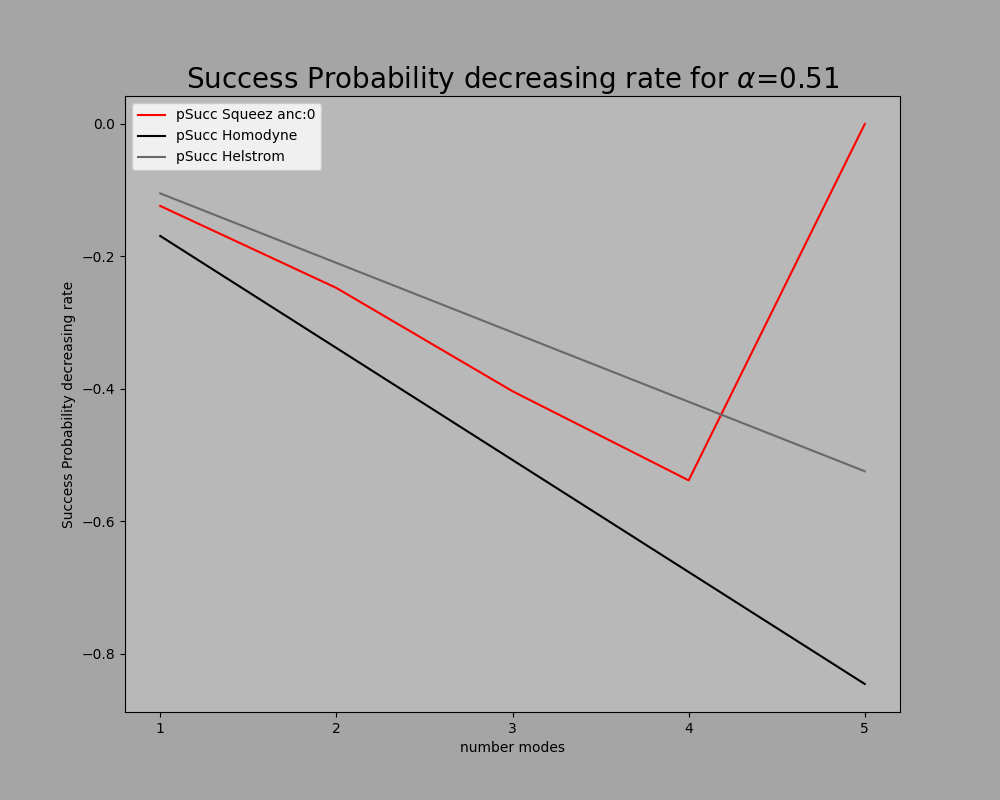

In [6]:
GlobalResultManager().plot_modes_probs(one_alpha=alphas[5], save_plot=False, apply_log=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
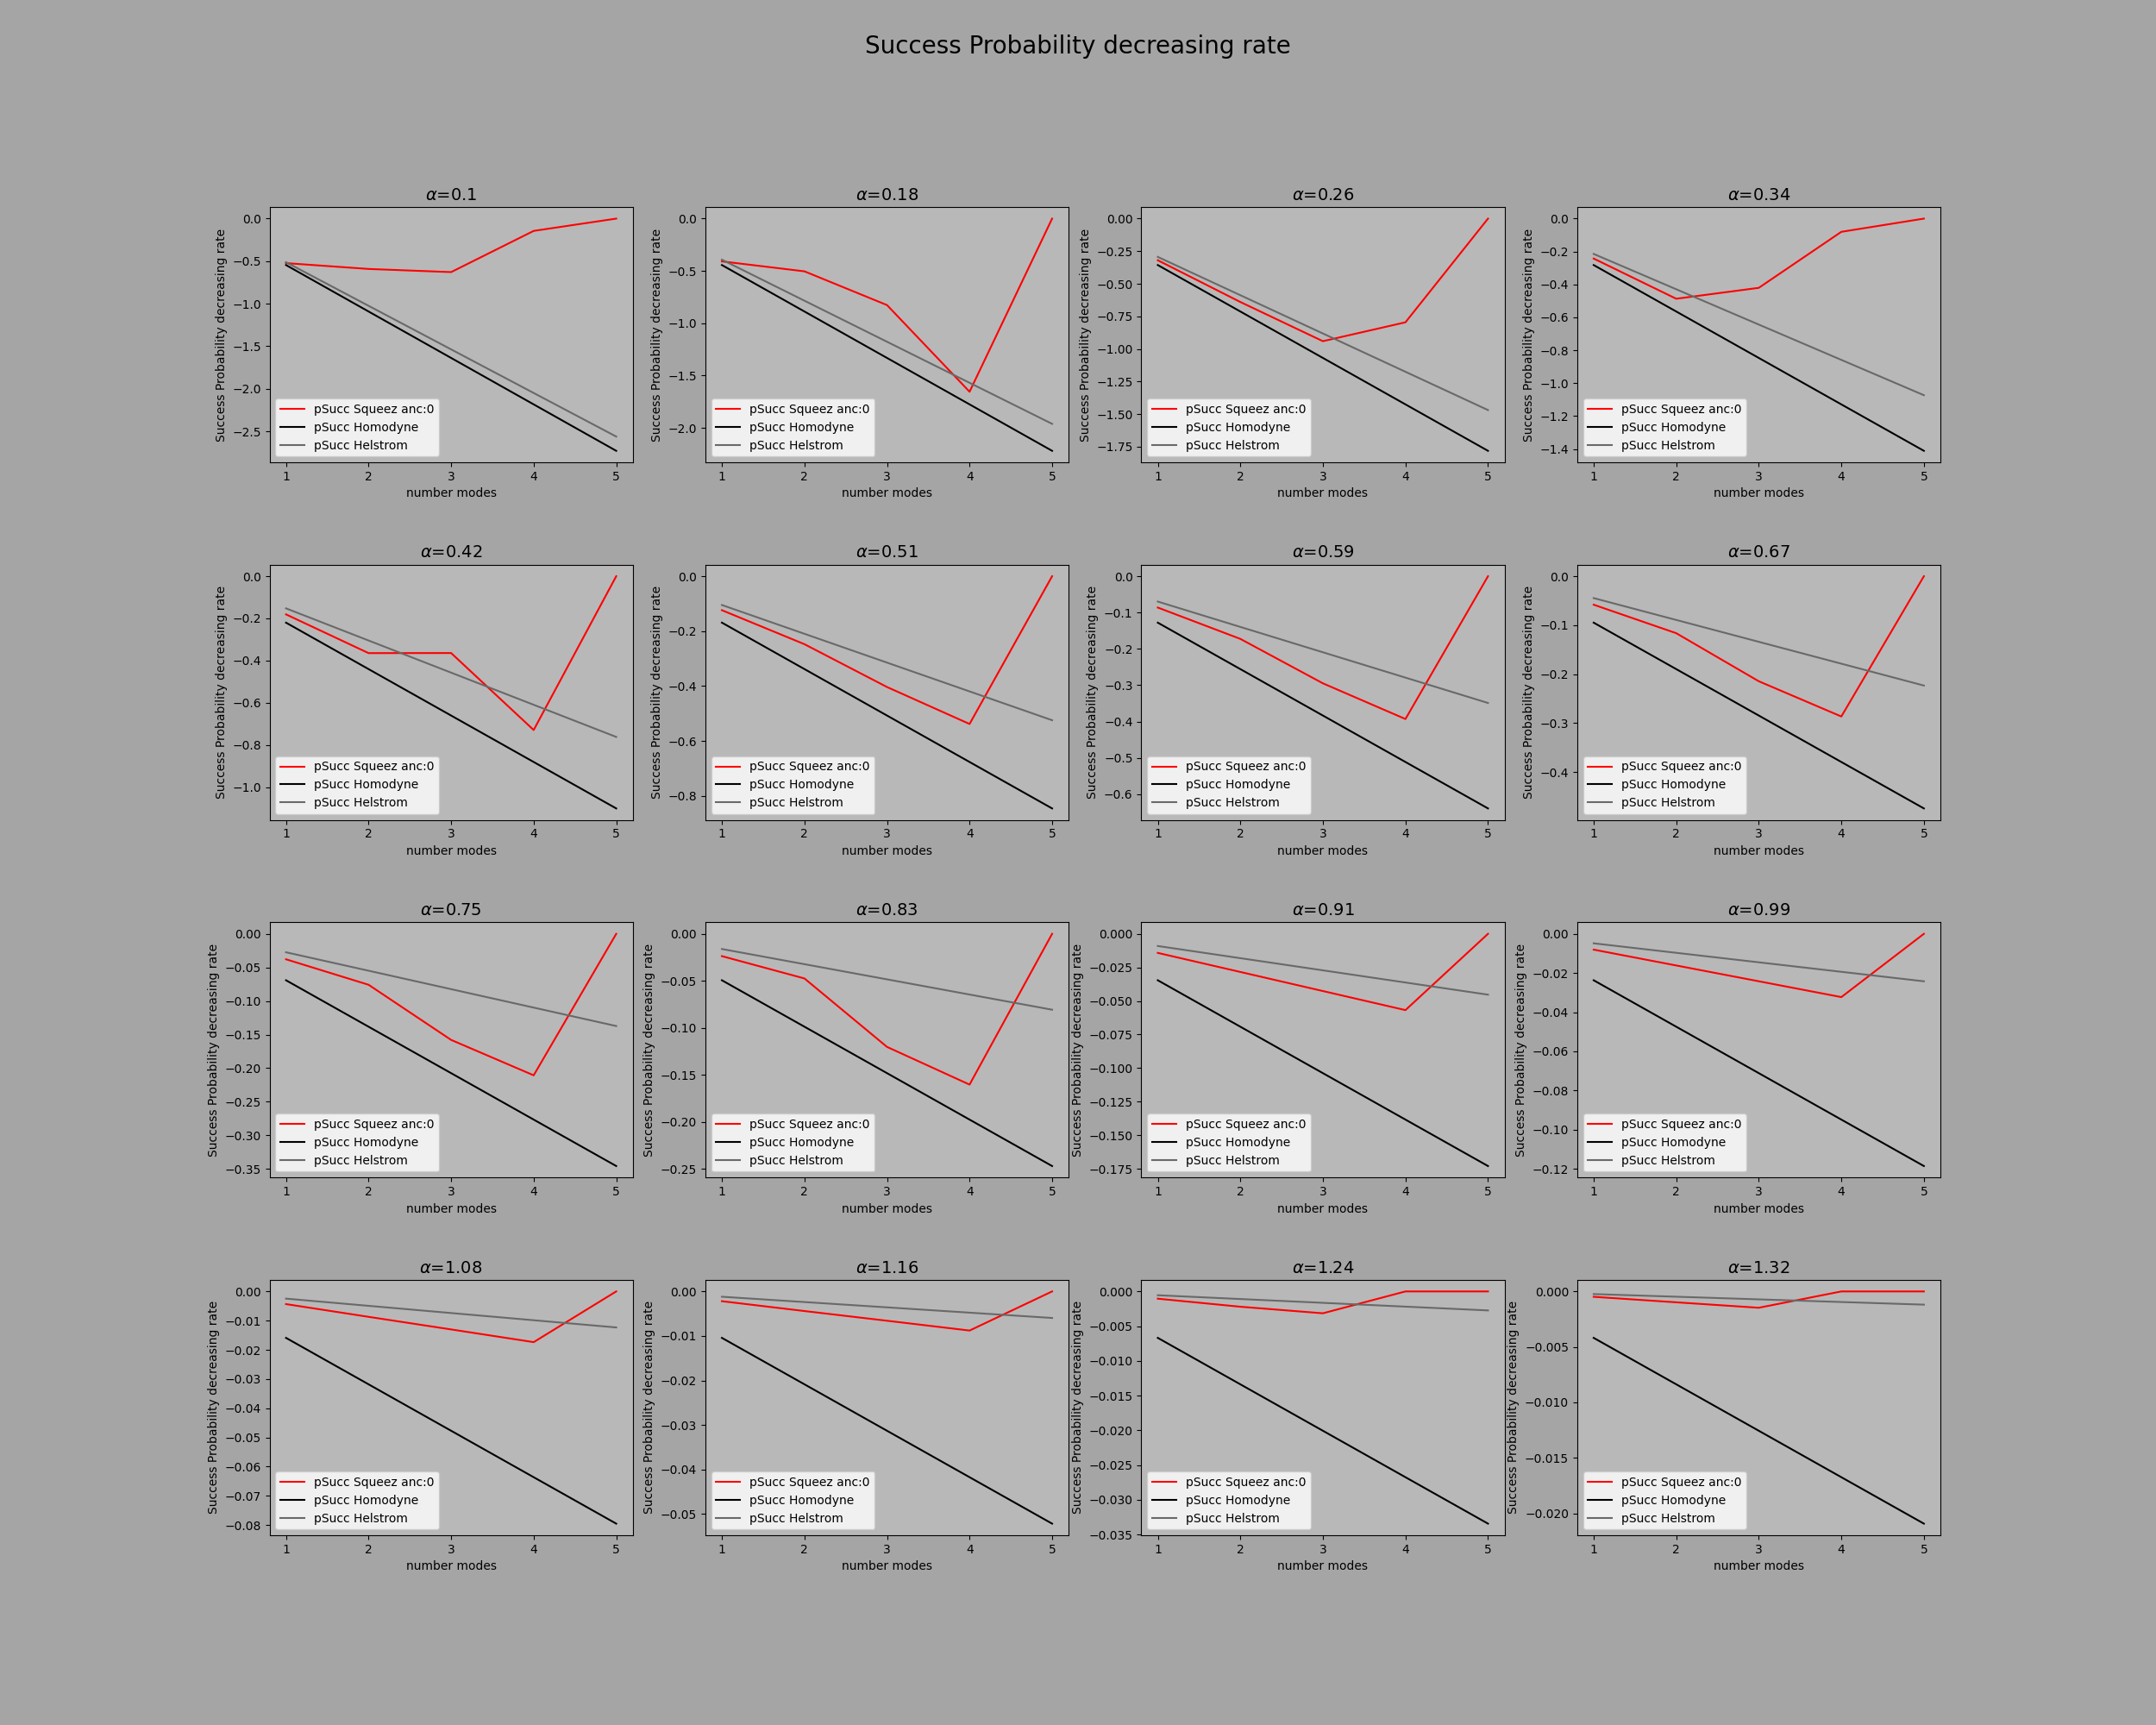

In [7]:
GlobalResultManager().plot_modes_probs(save_plot=False, apply_log=True)

## Q3: How does the results differ depending on the resources used?

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
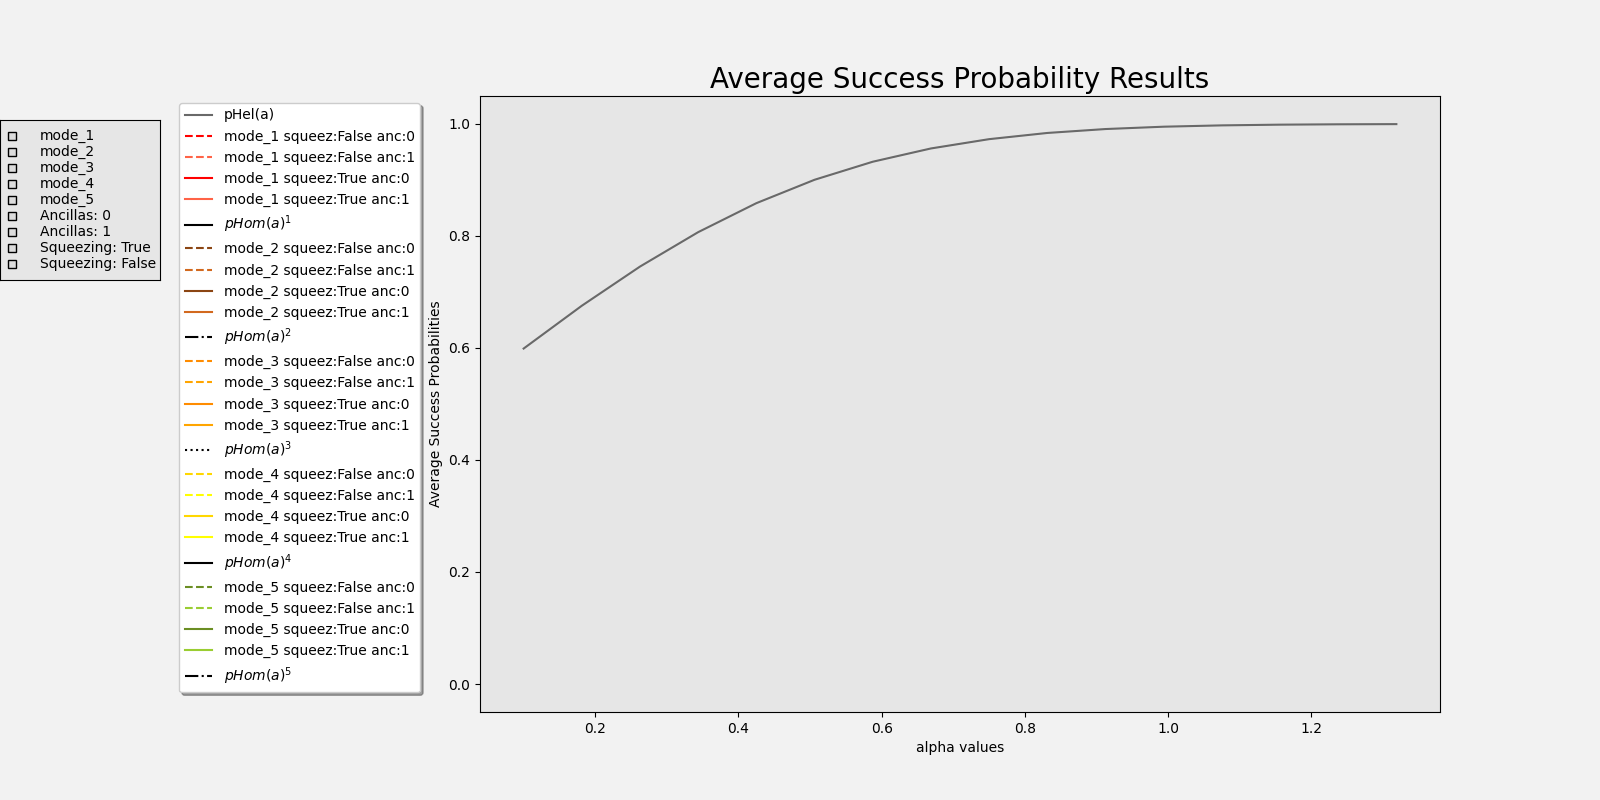

In [8]:
GlobalResultManager().plot_success_probabilities(interactive_plot=True)